# Project Introduction: Titanic - Machine Learning from Disaster

In this project, we applied machine learning techniques to predict the survival of passengers aboard the Titanic, based on various features such as age, sex, class, and fare. This dataset, provided by Kaggle, is a popular challenge used to introduce individuals to predictive modeling and machine learning concepts. The primary goal is to develop a predictive model that can classify whether a passenger survived or not based on the available information.

## Objectives:

* **Predict Survival**: The goal of this project is to predict whether a passenger survived the Titanic disaster or not.
* **Data Exploration**: Understand the relationships between various features and the target variable (survival).
* **Model Development**: Build and evaluate several machine learning models to find the most accurate prediction model.

## Step 1: Import Required Libraries and Load Datasets

The first step in the project was to import the necessary libraries and load the **Titanic dataset**. We used popular libraries such as **Pandas** for data manipulation, **NumPy** for numerical operations, and **Matplotlib** and **Seaborn** for data visualization. Additionally, machine learning libraries like **Scikit-learn** were used for model building and evaluation.

In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the train and test datasets

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## Step 2: Exploratory Data Analysis (EDA)

In the **Exploratory Data Analysis (EDA)** phase, we examined the Titanic dataset to understand its structure, identify patterns, and detect any missing or outlier values. We used **Pandas** to summarize the data and **Seaborn** and **Matplotlib** for visualizations.

In [3]:
# Display train data info

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Describe train data

train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Display first 5 row of train data

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


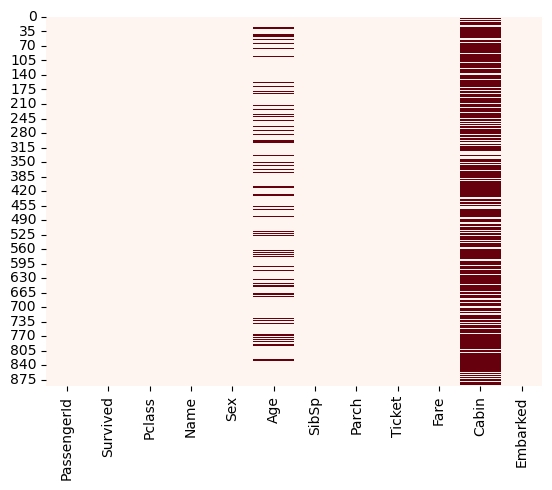

In [6]:
# Visualize missing data

sns.heatmap(train.isnull(), cbar = False, cmap = "Reds")
plt.show()

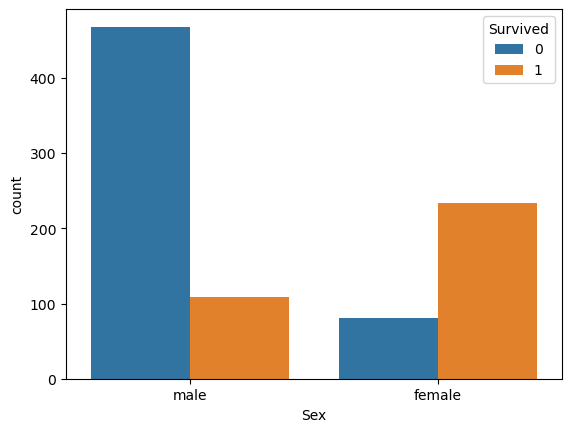

In [7]:
# Visualize survival rates by feature

sns.barplot(x = 'Pclass', y = 'Survived', data = train)
sns.countplot(x = 'Sex', hue = 'Survived', data = train)
plt.show()

## Step 3: Data Preprocessing

In the **Data Preprocessing** stage, we focused on preparing the Titanic dataset for machine learning models. This included handling missing values, encoding categorical variables, and scaling numerical features.

In [8]:
# Handle missing values

train['Age'].fillna(train['Age'].median(), inplace=True)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)
test['Fare'].fillna(test['Fare'].median(), inplace=True)

In [9]:
# Encode categorical variables

train = pd.get_dummies(train, columns = ['Sex', 'Embarked'], drop_first = True)
test = pd.get_dummies(test, columns = ['Sex', 'Embarked'], drop_first = True)

In [10]:
# Drop unnecessary columns (e.g., Name, Ticket, Cabin)

train.drop(['Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)
test.drop(['Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [11]:
# Separate features and target variable

X_train = train.drop(['Survived'], axis = 1)
y_train = train['Survived']
X_test = test

## Step 4: Build and Train a Model

In the **Model Training** phase, we applied multiple machine learning algorithms to predict passenger survival on the Titanic. We started by splitting the preprocessed data into training and validation sets using **train_test_split** from **Scikit-learn** to evaluate model performance.

The models we trained included:

1. **Random Forest**: An ensemble learning method that creates multiple decision trees to improve accuracy and reduce overfitting.
2. **Logistic Regression**: A simple linear model used as a baseline for classification.
3. **XGBoost**: A boosting algorithm that focuses on minimizing error by combining weak learners.

Each model was trained using the training data, and we evaluated its performance using accuracy scores on the validation set.

### 1. Random Forest Classifier

First, we train the data with **Random Forest** model. Random Forest is an ensemble learning method based on decision trees, and it tends to perform well without much hyperparameter tuning or feature engineering.

In [12]:
# Import machine learning libraries

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [13]:
# Split the training data for validation

X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

In [14]:
# Train a Random Forest model

model = RandomForestClassifier(n_estimators = 100, random_state = 42)
model.fit(X_train_split, y_train_split)

RandomForestClassifier(random_state=42)

In [15]:
# Evaluate the model

y_pred = model.predict(X_val)
print("Random Forrest Accuracy Score:", accuracy_score(y_val, y_pred))

Random Forrest Accuracy Score: 0.8212290502793296


### 2. Logistic Regression

Second, we train the data with **Logistic Regression** model. Logistic Regression is a simple model that is often a good baseline for binary classification problems.

In [16]:
# Import Logistic Regression libraries

from sklearn.linear_model import LogisticRegression

In [17]:
# Initialize and train the Logistic Regression model

logreg = LogisticRegression(max_iter = 1000, random_state = 42)
logreg.fit(X_train_split, y_train_split)

LogisticRegression(max_iter=1000, random_state=42)

In [18]:
# Predict and evaluate

y_pred_logreg = logreg.predict(X_val)
print("Logistic Regression Accuracy Score:", accuracy_score(y_val, y_pred_logreg))

Logistic Regression Accuracy Score: 0.8044692737430168


### 3. Extreme Gradient Boosting (XGBoost)

Third, we train the data with **Extreme Gradient Boosting (XGBoost)**. XGBoost is a powerful ensemble method and often performs.

In [19]:
# Import XGBoost libraries

import xgboost as xgb

In [20]:
# Initialize and train the XGBoost model

xgb_model = xgb.XGBClassifier(random_state = 42)
xgb_model.fit(X_train_split, y_train_split)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [21]:
# Predict and evaluate

y_pred_xgb = xgb_model.predict(X_val)
print("XGBoost Accuracy Score:", accuracy_score(y_val, y_pred_xgb))

XGBoost Accuracy Score: 0.7932960893854749


In [22]:
# Display all 3 models' accuracy score

print("Random Forrest Accuracy Score:", accuracy_score(y_val, y_pred))
print("Logistic Regression Accuracy Score:", accuracy_score(y_val, y_pred_logreg))
print("XGBoost Accuracy Score:", accuracy_score(y_val, y_pred_xgb))

Random Forrest Accuracy Score: 0.8212290502793296
Logistic Regression Accuracy Score: 0.8044692737430168
XGBoost Accuracy Score: 0.7932960893854749


## Step 6: Tune Hyperparameters using GridSearchCV

To improve the performance of the models, we used **GridSearchCV** for hyperparameter tuning. GridSearchCV helps in finding the best combination of hyperparameters by performing an exhaustive search over a specified parameter grid and evaluating each combination using cross-validation.

After performing GridSearchCV, we selected the best hyperparameters for each model and retrained them to obtain their final, optimized performance.

### 1. GridSearchCV for Random Forest

GridSearchCV exhaustively tests combinations of hyperparameters to find the best one.

In [23]:
# Import GridSearchCV libraries

from sklearn.model_selection import GridSearchCV

In [24]:
# Define the parameter grid for Random Forest

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [25]:
# Initialize and perform GridSearchCV

grid_search_rf = GridSearchCV(estimator = RandomForestClassifier(random_state = 42), 
                              param_grid = param_grid_rf, 
                              cv = 3, 
                              scoring = 'accuracy', 
                              n_jobs = -1)

grid_search_rf.fit(X_train_split, y_train_split)
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)

Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


In [26]:
# Evaluate the best model

best_rf_model = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_val)
print("Random Forest accuracy score after tuning:", accuracy_score(y_val, y_pred_best_rf))

Random Forest accuracy score after tuning: 0.8156424581005587


### 2. GridSearchCV for Logistic Regression

For Logistic Regression, the most important hyperparameters are:

1. C: Regularization parameter.
2. solver: The algorithm to use for optimization (e.g., 'liblinear', 'newton-cg', 'saga')

In [27]:
# Define the hyperparameter grid for Logistic Regression

param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'newton-cg', 'saga'],  # Optimization algorithms
    'max_iter': [100, 200, 300]  # Maximum number of iterations
}

In [28]:
# Initialize the model and GridSearchCV

logreg = LogisticRegression(random_state = 42)
grid_search_logreg = GridSearchCV(estimator = logreg, param_grid = param_grid_logreg, 
                                  cv = 5, scoring = 'accuracy', n_jobs = -1, verbose = 1)

In [29]:
# Fit the GridSearchCV

grid_search_logreg.fit(X_train_split, y_train_split)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


/Users/zaedyussof/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/zaedyussof/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/zaedyussof/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/zaedyussof/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/zaedyussof/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/zaedyussof/anaconda3/lib/python3.

/Users/zaedyussof/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/zaedyussof/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/zaedyussof/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/zaedyussof/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/zaedyussof/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/zaedyussof/anaconda3/lib/python3.

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300],
                         'solver': ['liblinear', 'newton-cg', 'saga']},
             scoring='accuracy', verbose=1)

In [30]:
# Print the best parameters and the accuracy

print("Best Parameters for Logistic Regression:", grid_search_logreg.best_params_)
best_logreg_model = grid_search_logreg.best_estimator_

Best Parameters for Logistic Regression: {'C': 1, 'max_iter': 100, 'solver': 'liblinear'}


In [31]:
# Evaluate the best model

y_pred_logreg = best_logreg_model.predict(X_val)
print("Logistic Regression accuracy score after tuning:", accuracy_score(y_val, y_pred_logreg))

Logistic Regression accuracy score after tuning: 0.7988826815642458


### 3. GridSearchCV for XGBoost

For XGBoost, the most important hyperparameters to tune are:

1. n_estimators: Number of trees (boosting rounds).
2. learning_rate: Shrinks the contribution of each tree.
3. max_depth: Maximum depth of a tree (controls overfitting).
4. subsample: Proportion of the training data to use for each tree.
5. colsample_bytree: Fraction of features to be used for each tree.

In [32]:
# Define the hyperparameter grid for XGBoost

param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

In [33]:
# Initialize the XGBoost model and GridSearchCV

xgb_model = xgb.XGBClassifier(random_state = 42)
grid_search_xgb = GridSearchCV(estimator = xgb_model, param_grid = param_grid_xgb, 
                               cv = 5, scoring = 'accuracy', n_jobs = -1, verbose = 1)

In [34]:
# Fit the GridSearchCV

grid_search_xgb.fit(X_train_split, y_train_split)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


/Users/zaedyussof/anaconda3/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy', verbose=1)

In [35]:
# Print the best parameters and the accuracy

print("Best Parameters for XGBoost:", grid_search_xgb.best_params_)
best_xgb_model = grid_search_xgb.best_estimator_

Best Parameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


In [36]:
# Evaluate the best model

y_pred_xgb = best_xgb_model.predict(X_val)
print("XGBoost accuracy score after tuning:", accuracy_score(y_val, y_pred_xgb))

XGBoost accuracy score after tuning: 0.8156424581005587


## Step 7: Model Evaluation

After training the models, the next step was to evaluate their performance. To assess the accuracy of each model, I used the accuracy score, which measures the proportion of correctly predicted survival outcomes. This allowed us to compare the effectiveness of different models, such as Logistic Regression, Random Forest, and XGBoost.

In [37]:
# Display all 3 models' accuracy score after tuning

print("Random Forest accuracy score after tuning:", accuracy_score(y_val, y_pred_best_rf))
print("Logistic Regression accuracy score after tuning:", accuracy_score(y_val, y_pred_logreg))
print("XGBoost accuracy score after tuning:", accuracy_score(y_val, y_pred_xgb))

Random Forest accuracy score after tuning: 0.8156424581005587
Logistic Regression accuracy score after tuning: 0.7988826815642458
XGBoost accuracy score after tuning: 0.8156424581005587


By tuning the hyperparameters with **GridSearchCV**, We ensured that each model was optimized for the best possible performance. Ultimately, **Random Forest** and **XGBoost** performed similarly, both achieving an accuracy of 0.8156. Based on factors such as interpretability and training time, we selected **Random Forest** as the final model for prediction.

## Conclusion

We have successfully tuned and compared multiple models (Random Forest, Logistic Regression, and XGBoost) for the **Titanic dataset**, and after testing different hyperparameters. We have found that both **Random Forest** and **XGBoost** offers the best performance with an accuracy of **0.8156**.

After experimenting with hyperparameter tuning for Random Forest, Logistic Regression, and XGBoost, we decided to go with **Random Forest**. It performed equally well as XGBoost, but it’s simpler, faster to train, and offers great interpretability.

Now that we have selected **Random Forest**, the next step is to retrain the model using the full training data (combining both the training and validation sets), so the model can learn from all available data before making predictions on the test set.

In [38]:
# Retrain the final Random Forest model on the full training set

final_rf_model = best_rf_model  # Our best Random Forest model
final_rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=50,
                       random_state=42)

In [39]:
# Make predictions on the test set

final_predictions = final_rf_model.predict(X_test)

In [40]:
# Prepare the submission

submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': final_predictions
})
submission.to_csv('final_submission.csv', index = False)

## -END-